In [1]:
#imports
import pathlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, select
from sqlalchemy.orm import sessionmaker
from flyerdetection.flyer_analysis_entry import FlyerAnalysisEntry

In [2]:
#constants
sqlite_db_path = pathlib.Path('.').resolve().parent.parent/'FlyerAnalysisStreamProcessor_output'/'flyer_testing.db'
#DB_CONNECTION_STRING = f'sqlite:///{sqlite_db_path.resolve()}'
engine = create_engine(DB_CONNECTION_STRING)#,echo=True)
Session = sessionmaker(bind=engine)

In [6]:
with Session() as session :
    rel_filepaths = session.scalars(select(FlyerAnalysisEntry.rel_filepath)).all()
video_folders = set()
for rel_filepath in rel_filepaths :
    video_folders.add('/'.join(rel_filepath.split('/')[:-1]))
for video_folder in video_folders :
    print(video_folder)

00 Before Automated Collection (2022-06-09)/High Speed Camera/2022_03_19/BMP/Camera_11_39_58
20220818/00 Before Automated Collection (2022-06-09)/High Speed Camera/2022_03_19/BMP/Camera_13_08_54
20220705/HS--20220705--00024/BMP/Camera_14_15_01
20220627/HS--20220627--00016/BMP/Camera_13_51_55
20220706/HS--20220706--00004/BMP/Camera_16_03_02
20220727/HS--20220727--00000/BMP/Camera_16_09_40
00 Before Automated Collection (2022-06-09)/High Speed Camera/2022_03_18/BMP/Camera_19_51_49
20220818/00 Before Automated Collection (2022-06-09)/High Speed Camera/2022_03_10/BMP/Camera_14_22_56
20220627
20220622/HS--20220622--00020/BMP/Camera_18_20_40
20220628/HS--20220628--00001/BMP/Camera_10_42_52
20221111/HS--20221111--00013/BMP/Camera_11_19_58
20220630/HS--20220630--00017/BMP/Camera_14_58_52
20220727/HS--20220727--00016/BMP/Camera_10_38_18
20220620/HS--20220620--00000/Camera_13_37_04
20220818/00 Before Automated Collection (2022-06-09)/High Speed Camera/2022_03_10/BMP/Camera_14_26_39
20220706/HS--

20220705/HS--20220705--00024/BMP/Camera_14_15_01: 227 good frames


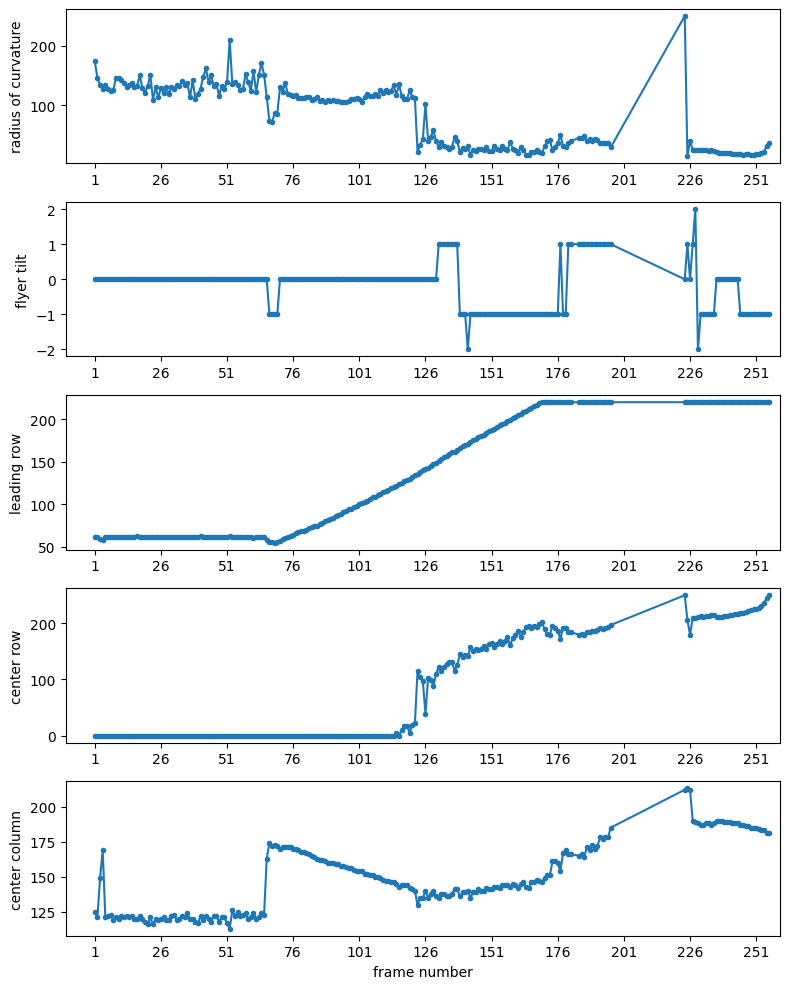

In [9]:
for video_folder in video_folders :
    if video_folder!='20220705/HS--20220705--00024/BMP/Camera_14_15_01' :
        continue
    with Session() as session :
        stmt = select(FlyerAnalysisEntry).where(FlyerAnalysisEntry.rel_filepath.startswith(video_folder))
        video_results = session.scalars(stmt.order_by(FlyerAnalysisEntry.rel_filepath)).all()
    n_good_results = 0
    for result in video_results :
        if result.exit_code==0 :
            n_good_results+=1
    print(f'{video_folder}: {n_good_results} good frames')
    frame_numbers = []
    radii = []
    tilts = []
    leading_rows = []
    center_rows = []
    center_columns = []
    for result in video_results :
        if result.exit_code!=0 :
            continue
        frame_number = int(result.rel_filepath.split('/')[-1].split('_')[-1][:-len('.bmp')])
        frame_numbers.append(frame_number)
        radii.append(result.radius if result.radius<=250. else 250.)
        tilts.append(result.tilt)
        leading_rows.append(result.leading_row)
        center_rows.append(max(0,min(250,result.center_row)))
        center_columns.append(max(0,min(400,result.center_column)))
    f,ax = plt.subplots(5,1,figsize=(8.,10.))
    for axs in ax :
        axs.set_xlim((-10,260))
        axs.set_xticks(list(range(1,256,25)))
        axs.set_xticklabels(list(range(1,256,25)))
    kwargs = {'marker':'.'}
    ax[0].plot(frame_numbers,radii,**kwargs)
    ax[0].set_ylabel('radius of curvature')
    ax[1].plot(frame_numbers,tilts,**kwargs)
    ax[1].set_ylabel('flyer tilt')
    ax[2].plot(frame_numbers,leading_rows,**kwargs)
    ax[2].set_ylabel('leading row')
    ax[3].plot(frame_numbers,center_rows,**kwargs)
    ax[3].set_ylabel('center row')
    ax[4].plot(frame_numbers,center_columns,**kwargs)
    ax[4].set_ylabel('center column')
    ax[4].set_xlabel('frame number')
    f.tight_layout()
    plt.show()
        
